<a href="https://colab.research.google.com/github/SalwaMustafa/DEPI-Tasks/blob/main/Salwa_Deep_Learning_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 Deep Learning Practical Assignment (Adult Income Dataset)

## 📌 Dataset
We will use the **Adult Income dataset** (also known as the Census Income dataset).  
The task is to predict whether a person earns **more than $50K/year** based on demographic and employment attributes.

---


In [1]:
# Option 1: Using OpenML via scikit-learn
from sklearn.datasets import fetch_openml
import pandas as pd

# Load dataset from OpenML
adult = fetch_openml(name="adult", version=2, as_frame=True)
df = pd.DataFrame(adult.data)   # Features
df['class'] = adult.target

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


## Part 0: Data Preparation
1. Load the dataset into a DataFrame.
2. Split the data into **training, validation, and test sets**.  
   - Suggested: 70% training, 15% validation, 15% test.
3. Apply any necessary preprocessing:
   - Handle categorical features (encoding).
   - Scale numerical features if needed.
4. After training your models, always report results on:
   - **Training accuracy**
   - **Validation accuracy**
   - **Test accuracy**
5. At the end of the assignment, **compare all methods** across train, validation, and test sets.


In [2]:
df.shape

(48842, 15)

In [3]:
df.isnull().sum()

,0
age,0
workclass,2799
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,2809
relationship,0
race,0
sex,0


In [4]:
for col in ['workclass', 'occupation', 'native-country']:
    df[col] = df[col].fillna(df[col].mode()[0])

In [5]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [6]:
df.duplicated().sum()

np.int64(53)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'class'],
      dtype='object')

In [10]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48789.000000,4.878900e+04,48789.000000,48789.000000,48789.000000,48789.000000
mean,38.653139,1.896697e+05,10.078809,1080.239829,87.597368,40.425895
std,13.708426,1.056182e+05,2.570072,7455.980728,403.213066,12.392856
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781400e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376080e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
df.describe(include="category")

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,class
count,48789,48789,48789,48789,48789,48789,48789,48789,48789
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,36654,15770,22366,8969,19703,41713,32614,44647,37108


In [12]:
df["workclass"].value_counts()

,count
workclass,
Private,36654
Self-emp-not-inc,3861
Local-gov,3136
State-gov,1981
Self-emp-inc,1694
Federal-gov,1432
Without-pay,21
Never-worked,10


In [13]:
rare_classes = ['Without-pay', 'Never-worked']
df['workclass'] = df['workclass'].replace(rare_classes, 'Other')

/tmp/ipython-input-1247077674.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['workclass'] = df['workclass'].replace(rare_classes, 'Other')


In [14]:
df["workclass"].value_counts()

,count
workclass,
Private,36654
Self-emp-not-inc,3861
Local-gov,3136
State-gov,1981
Self-emp-inc,1694
Federal-gov,1432
Other,31


In [15]:
df["education"].value_counts()

,count
education,
HS-grad,15770
Some-college,10862
Bachelors,8013
Masters,2656
Assoc-voc,2060
11th,1812
Assoc-acdm,1601
10th,1389
7th-8th,954


In [16]:
def map_education(edu):
    if edu in ['Preschool', '1st-4th', '5th-6th']:
        return 'Primary'
    elif edu in ['7th-8th','9th','10th','11th','12th','HS-grad']:
        return 'HighSchool'
    elif edu in ['Some-college','Assoc-voc','Assoc-acdm']:
        return 'SomeCollege'
    elif edu == 'Bachelors':
        return 'Bachelors'
    else:
        return 'Advanced'

df['education'] = df['education'].apply(map_education)

In [17]:
df["education"].value_counts()

,count
education,
HighSchool,21336
SomeCollege,14523
Bachelors,8013
Advanced,4084
Primary,833


In [18]:
df["marital-status"].value_counts()

,count
marital-status,
Married-civ-spouse,22366
Never-married,16081
Divorced,6630
Separated,1530
Widowed,1518
Married-spouse-absent,627
Married-AF-spouse,37


In [19]:
df['marital-status'] = df['marital-status'].replace({
    'Married-civ-spouse':'Married',
    'Married-spouse-absent':'Married',
    'Married-AF-spouse':'Married',
    'Never-married':'Single',
    'Divorced':'PreviouslyMarried',
    'Separated':'PreviouslyMarried',
    'Widowed':'PreviouslyMarried'
})

/tmp/ipython-input-3268476178.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['marital-status'] = df['marital-status'].replace({


In [20]:
df["marital-status"].value_counts()

,count
marital-status,
Married,23030
Single,16081
PreviouslyMarried,9678


In [21]:
df["occupation"].value_counts()

,count
occupation,
Prof-specialty,8969
Craft-repair,6102
Exec-managerial,6082
Adm-clerical,5606
Sales,5501
Other-service,4919
Machine-op-inspct,3017
Transport-moving,2355
Handlers-cleaners,2071


In [22]:
def map_occupation(occ):
    if occ in ['Prof-specialty','Tech-support']:
        return 'Professional'
    elif occ in ['Exec-managerial','Adm-clerical','Sales']:
        return 'Executive/Admin'
    elif occ in ['Priv-house-serv','Other-service','Craft-repair','Machine-op-inspct','Transport-moving','Handlers-cleaners','Farming-fishing']:
        return 'Craft/Manual'
    elif occ in ['Protective-serv','Armed-Forces']:
        return 'Service'
    else:
        return 'Other'

df['occupation'] = df['occupation'].apply(map_occupation)


In [23]:
df["occupation"].value_counts()

,count
occupation,
Craft/Manual,20189
Executive/Admin,17189
Professional,10414
Service,997


In [24]:
df["relationship"].value_counts()

,count
relationship,
Husband,19703
Not-in-family,12557
Own-child,7568
Unmarried,5124
Wife,2331
Other-relative,1506


In [25]:
df = df.drop(columns=['relationship'])

In [26]:
df["race"].value_counts()

,count
race,
White,41713
Black,4683
Asian-Pac-Islander,1517
Amer-Indian-Eskimo,470
Other,406


In [27]:
df["sex"].value_counts()

,count
sex,
Male,32614
Female,16175


In [28]:
df["native-country"].value_counts()

,count
native-country,
United-States,44647
Mexico,943
Philippines,294
Germany,206
Puerto-Rico,184
Canada,182
El-Salvador,155
India,151
Cuba,138


In [29]:
df['native-country'] = df['native-country'].apply(lambda x: 'United-States' if x=='United-States' else 'Other')

In [30]:
df["native-country"].value_counts()

,count
native-country,
United-States,44647
Other,4142


In [31]:
df["class"].value_counts()

,count
class,
<=50K,37108
>50K,11681


In [32]:
df['class'] = df['class'].apply(lambda x: 0 if x=='<=50K' else 1)

In [33]:
df = df.drop(columns=['fnlwgt'])

In [34]:
import numpy as np
df['capital-gain'] = np.log1p(df['capital-gain'])
df['capital-loss'] = np.log1p(df['capital-loss'])

In [35]:
from sklearn.model_selection import train_test_split

X = df.drop(columns="class")
y = df["class"]

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print(X_train.shape, X_val.shape, X_test.shape)

(34152, 12) (7318, 12) (7319, 12)


In [36]:
df.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'race', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'class'],
      dtype='object')

In [37]:
numerical_cols = ['age','education-num','capital-gain','capital-loss','hours-per-week']
categorical_cols = ['workclass','education','marital-status','race','sex','native-country','occupation']


In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_val[numerical_cols] = scaler.transform(X_val[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


In [39]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

X_train_cat = ohe.fit_transform(X_train[categorical_cols])
X_val_cat = ohe.transform(X_val[categorical_cols])
X_test_cat = ohe.transform(X_test[categorical_cols])


In [40]:
import numpy as np

X_train_final = np.hstack([X_train[numerical_cols].values, X_train_cat])
X_val_final = np.hstack([X_val[numerical_cols].values, X_val_cat])
X_test_final = np.hstack([X_test[numerical_cols].values, X_test_cat])


In [41]:
X_train_final.shape

(34152, 33)

In [46]:
X_train_final.dtype

dtype('float64')

In [47]:
X_train_final = X_train_final.astype('float32')
X_val_final = X_val_final.astype('float32')
X_test_final = X_test_final.astype('float32')

y_train = y_train.astype('float32')
y_val = y_val.astype('float32')
y_test = y_test.astype('float32')

In [42]:
ohe_feature_names = ohe.get_feature_names_out(categorical_cols)

all_columns = numerical_cols + list(ohe_feature_names)

X_train_df = pd.DataFrame(X_train_final, columns=all_columns)
X_train_df.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Other,workclass_Private,workclass_Self-emp-inc,...,race_Other,race_White,sex_Female,sex_Male,native-country_Other,native-country_United-States,occupation_Craft/Manual,occupation_Executive/Admin,occupation_Professional,occupation_Service
0,0.538182,1.922199,-0.296786,-0.221223,-0.034690,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-0.412146,1.141691,-0.296786,-0.221223,-0.034690,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.611285,-2.370593,-0.296786,-0.221223,0.609975,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
3,-1.435576,-0.029070,-0.296786,-0.221223,-0.034690,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.611285,-3.151101,-0.296786,-0.221223,-0.034690,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0



## Part 1: Optimizers
1. Train the same neural network using:
   - Stochastic Gradient Descent (SGD)
   - SGD with Momentum
   - Adam
2. Compare the training and validation accuracy for each optimizer.
3. Which optimizer converges the fastest? Which gives the best generalization?
4. Explain *why* Adam often performs better than plain SGD.

---


In [43]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

In [44]:
len(tf.config.list_physical_devices('GPU'))

1

In [48]:
input_dim = X_train_final.shape[1]

model_sgd = Sequential()
model_sgd.add(Dense(64, input_dim=input_dim, activation='relu'))
model_sgd.add(Dense(32, activation='relu'))
model_sgd.add(Dense(1, activation='sigmoid'))

model_sgd.compile(optimizer=SGD(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

history_sgd = model_sgd.fit(X_train_final, y_train, validation_data=(X_val_final, y_val), epochs=20, batch_size=32, verbose=1)

train_acc_sgd = model_sgd.evaluate(X_train_final, y_train, verbose=0)[1]
val_acc_sgd = model_sgd.evaluate(X_val_final, y_val, verbose=0)[1]
test_acc_sgd = model_sgd.evaluate(X_test_final, y_test, verbose=0)[1]


Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1068/1068 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7842 - loss: 0.4899 - val_accuracy: 0.8388 - val_loss: 0.3509
Epoch 2/20
1068/1068 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8363 - loss: 0.3474 - val_accuracy: 0.8418 - val_loss: 0.3381
Epoch 3/20
1068/1068 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8373 - loss: 0.3391 - val_accuracy: 0.8429 - val_loss: 0.3342
Epoch 4/20
1068/1068 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8402 - loss: 0.3340 - val_accuracy: 0.8437 - val_loss: 0.3321
Epoch 5/20
1068/1068 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8445 - loss: 0.3328 - val_accuracy: 0.8454 - val_loss: 0.3303
Epoch 6/20
1068/1068 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8437 - loss: 0.3293 - val_accuracy: 0.8429 - val_loss: 0.3297
Epoch 7/20
1068/1068 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8443 - loss: 0.3276 - val_accuracy: 0.8463 - val_loss: 0.3277
Epoch 8/20
1068/1068 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8482 - loss: 0.3234 - val_accurac

In [49]:
model_sgd_mom = Sequential()
model_sgd_mom.add(Dense(64, input_dim=input_dim, activation='relu'))
model_sgd_mom.add(Dense(32, activation='relu'))
model_sgd_mom.add(Dense(1, activation='sigmoid'))

model_sgd_mom.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), loss='binary_crossentropy', metrics=['accuracy'])

history_sgd_mom = model_sgd_mom.fit(X_train_final, y_train, validation_data=(X_val_final, y_val), epochs=20, batch_size=32, verbose=1)

train_acc_sgd_mom = model_sgd_mom.evaluate(X_train_final, y_train, verbose=0)[1]
val_acc_sgd_mom = model_sgd_mom.evaluate(X_val_final, y_val, verbose=0)[1]
test_acc_sgd_mom = model_sgd_mom.evaluate(X_test_final, y_test, verbose=0)[1]

Epoch 1/20
1068/1068 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8076 - loss: 0.3850 - val_accuracy: 0.8479 - val_loss: 0.3297
Epoch 2/20
1068/1068 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8436 - loss: 0.3296 - val_accuracy: 0.8442 - val_loss: 0.3271
Epoch 3/20
1068/1068 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8457 - loss: 0.3240 - val_accuracy: 0.8475 - val_loss: 0.3306
Epoch 4/20
1068/1068 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8521 - loss: 0.3196 - val_accuracy: 0.8461 - val_loss: 0.3212
Epoch 5/20
1068/1068 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8485 - loss: 0.3235 - val_accuracy: 0.8493 - val_loss: 0.3177
Epoch 6/20
1068/1068 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8569 - loss: 0.3124 - val_accuracy: 0.8543 - val_loss: 0.3147
Epoch 7/20
1068/1068 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8518 - loss: 0.3129 - val_accuracy: 0.8556 - val_loss: 0.3115
Epoch 8/20
1068/1068 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8559 - loss: 0.3140 - 

In [50]:
model_adam = Sequential()
model_adam.add(Dense(64, input_dim=input_dim, activation='relu'))
model_adam.add(Dense(32, activation='relu'))
model_adam.add(Dense(1, activation='sigmoid'))

model_adam.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

history_adam = model_adam.fit(X_train_final, y_train, validation_data=(X_val_final, y_val), epochs=20, batch_size=64, verbose=1)

train_acc_adam = model_adam.evaluate(X_train_final, y_train, verbose=0)[1]
val_acc_adam = model_adam.evaluate(X_val_final, y_val, verbose=0)[1]
test_acc_adam = model_adam.evaluate(X_test_final, y_test, verbose=0)[1]

Epoch 1/20
534/534 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8051 - loss: 0.4013 - val_accuracy: 0.8446 - val_loss: 0.3287
Epoch 2/20
534/534 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8491 - loss: 0.3247 - val_accuracy: 0.8472 - val_loss: 0.3235
Epoch 3/20
534/534 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8491 - loss: 0.3242 - val_accuracy: 0.8494 - val_loss: 0.3209
Epoch 4/20
534/534 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8538 - loss: 0.3212 - val_accuracy: 0.8520 - val_loss: 0.3164
Epoch 5/20
534/534 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8518 - loss: 0.3173 - val_accuracy: 0.8547 - val_loss: 0.3169
Epoch 6/20
534/534 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8518 - loss: 0.3150 - val_accuracy: 0.8541 - val_loss: 0.3133
Epoch 7/20
534/534 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.8552 - loss: 0.3116 - val_accuracy: 0.8489 - val_loss: 0.3171
Epoch 8/20
534/534 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8548 - loss: 0.3165 - val_accuracy: 0

**Adam** combines the advantages of **momentum** and adaptive learning rates. Unlike plain **SGD**, which uses a fixed learning rate for all parameters, Adam adjusts the learning rate for each weight individually based on estimates of first (mean) and second (variance) moments of the gradients. This allows Adam to converge faster, navigate ravines or steep/shallow regions more effectively and require less manual tuning of the learning rate.

## Part 2: Batch Size
1. Train the same model with different batch sizes (e.g., 1, 32, 128, 1024).
2. Compare:
   - Training speed
   - Validation accuracy
   - Test accuracy
   - Generalization ability
3. Which batch size leads to the **noisiest gradient updates**?
4. Which batch size generalizes better and why?

In [51]:
batch_sizes = [1, 32, 128, 1024]

results_batch = {}

for batch in batch_sizes:
    print(f"\nTraining with batch size = {batch}")

    model = Sequential()
    model.add(Dense(64, input_dim=X_train_final.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train_final, y_train, validation_data=(X_val_final, y_val), epochs=20, batch_size=batch, verbose=1)

    train_acc = model.evaluate(X_train_final, y_train, verbose=0)[1]
    val_acc = model.evaluate(X_val_final, y_val, verbose=0)[1]
    test_acc = model.evaluate(X_test_final, y_test, verbose=0)[1]

    results_batch[batch] = {'train_acc': train_acc,'val_acc': val_acc,'test_acc': test_acc}

print("\n=== Batch Size Summary ===")
for batch, r in results_batch.items():
    print(f"Batch {batch}: Train={r['train_acc']:.4f}, Val={r['val_acc']:.4f}, Test={r['test_acc']:.4f}")



Training with batch size = 1
Epoch 1/20
34152/34152 ━━━━━━━━━━━━━━━━━━━━ 107s 3ms/step - accuracy: 0.8353 - loss: 0.3540 - val_accuracy: 0.8471 - val_loss: 0.3279
Epoch 2/20
34152/34152 ━━━━━━━━━━━━━━━━━━━━ 104s 3ms/step - accuracy: 0.8471 - loss: 0.3310 - val_accuracy: 0.8491 - val_loss: 0.3221
Epoch 3/20
34152/34152 ━━━━━━━━━━━━━━━━━━━━ 108s 3ms/step - accuracy: 0.8500 - loss: 0.3267 - val_accuracy: 0.8509 - val_loss: 0.3221
Epoch 4/20
34152/34152 ━━━━━━━━━━━━━━━━━━━━ 157s 4ms/step - accuracy: 0.8527 - loss: 0.3207 - val_accuracy: 0.8565 - val_loss: 0.3143
Epoch 5/20
34152/34152 ━━━━━━━━━━━━━━━━━━━━ 152s 4ms/step - accuracy: 0.8552 - loss: 0.3134 - val_accuracy: 0.8532 - val_loss: 0.3168
Epoch 6/20
34152/34152 ━━━━━━━━━━━━━━━━━━━━ 110s 3ms/step - accuracy: 0.8566 - loss: 0.3110 - val_accuracy: 0.8509 - val_loss: 0.3203
Epoch 7/20
34152/34152 ━━━━━━━━━━━━━━━━━━━━ 101s 3ms/step - accuracy: 0.8532 - loss: 0.3138 - val_accuracy: 0.8530 - val_loss: 0.3148
Epoch 8/20
34152/34152 ━━━━━━━━━

**Which batch size leads to the noisiest gradient updates?**   **(1)** --> Because each gradient update is computed from a single sample, introducing high stochasticity (noise) in the updates.

**Which batch size generalizes better and why?**   Small to moderate batch sizes **(32–128)**

The noise in gradient updates acts as a form of regularization, helping the model escape sharp minima and avoid overfitting, which improves generalization on unseen data.


## Part 3: Overfitting and Regularization
1. Train a large neural network (many parameters) on the dataset.
2. Observe training vs. validation accuracy.  
   - Do you see signs of overfitting?
3. Apply regularization techniques:
   - **L2 regularization**
   - **Dropout**
4. Compare the validation results before and after regularization.
5. Which regularization method was more effective in reducing overfitting? Why?

---


In [52]:
model_large = Sequential()
model_large.add(Dense(256, input_dim=input_dim, activation='relu'))
model_large.add(Dense(128, activation='relu'))
model_large.add(Dense(64, activation='relu'))
model_large.add(Dense(1, activation='sigmoid'))

model_large.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

history_large = model_large.fit(X_train_final, y_train, validation_data=(X_val_final, y_val), epochs=30, batch_size=32, verbose=1)

Epoch 1/30
1068/1068 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8322 - loss: 0.3539 - val_accuracy: 0.8479 - val_loss: 0.3229
Epoch 2/30
1068/1068 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8502 - loss: 0.3258 - val_accuracy: 0.8546 - val_loss: 0.3199
Epoch 3/30
1068/1068 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8522 - loss: 0.3227 - val_accuracy: 0.8512 - val_loss: 0.3158
Epoch 4/30
1068/1068 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8565 - loss: 0.3100 - val_accuracy: 0.8513 - val_loss: 0.3186
Epoch 5/30
1068/1068 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8579 - loss: 0.3093 - val_accuracy: 0.8513 - val_loss: 0.3132
Epoch 6/30
1068/1068 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8557 - loss: 0.3075 - val_accuracy: 0.8524 - val_loss: 0.3144
Epoch 7/30
1068/1068 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8555 - loss: 0.3081 - val_accuracy: 0.8491 - val_loss: 0.3261
Epoch 8/30
1068/1068 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8598 - loss: 0.3064 - 

yes, there is an overfitting

In [54]:
from tensorflow.keras.regularizers import l2

model_l2 = Sequential()
model_l2.add(Dense(256, input_dim=input_dim, activation='relu', kernel_regularizer=l2(0.001)))
model_l2.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model_l2.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model_l2.add(Dense(1, activation='sigmoid'))

model_l2.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

history_l2 = model_l2.fit(X_train_final, y_train, validation_data=(X_val_final, y_val), epochs=30, batch_size=32, verbose=1)

Epoch 1/30
1068/1068 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8318 - loss: 0.5076 - val_accuracy: 0.8457 - val_loss: 0.3602
Epoch 2/30
1068/1068 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8418 - loss: 0.3571 - val_accuracy: 0.8459 - val_loss: 0.3459
Epoch 3/30
1068/1068 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8463 - loss: 0.3458 - val_accuracy: 0.8448 - val_loss: 0.3452
Epoch 4/30
1068/1068 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8489 - loss: 0.3396 - val_accuracy: 0.8476 - val_loss: 0.3333
Epoch 5/30
1068/1068 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8483 - loss: 0.3395 - val_accuracy: 0.8531 - val_loss: 0.3292
Epoch 6/30
1068/1068 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8533 - loss: 0.3310 - val_accuracy: 0.8500 - val_loss: 0.3296
Epoch 7/30
1068/1068 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8543 - loss: 0.3295 - val_accuracy: 0.8505 - val_loss: 0.3264
Epoch 8/30
1068/1068 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8511 - loss: 0.3327 - 

In [55]:
from tensorflow.keras.layers import Dropout

model_dropout = Sequential()
model_dropout.add(Dense(256, input_dim=input_dim, activation='relu'))
model_dropout.add(Dropout(0.5))
model_dropout.add(Dense(128, activation='relu'))
model_dropout.add(Dropout(0.5))
model_dropout.add(Dense(64, activation='relu'))
model_dropout.add(Dropout(0.5))
model_dropout.add(Dense(1, activation='sigmoid'))

model_dropout.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

history_dropout = model_dropout.fit(X_train_final, y_train, validation_data=(X_val_final, y_val), epochs=30, batch_size=32, verbose=1)


Epoch 1/30
1068/1068 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7992 - loss: 0.4126 - val_accuracy: 0.8471 - val_loss: 0.3270
Epoch 2/30
1068/1068 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8403 - loss: 0.3510 - val_accuracy: 0.8489 - val_loss: 0.3313
Epoch 3/30
1068/1068 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8447 - loss: 0.3458 - val_accuracy: 0.8490 - val_loss: 0.3274
Epoch 4/30
1068/1068 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8461 - loss: 0.3393 - val_accuracy: 0.8493 - val_loss: 0.3247
Epoch 5/30
1068/1068 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8464 - loss: 0.3412 - val_accuracy: 0.8517 - val_loss: 0.3210
Epoch 6/30
1068/1068 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8476 - loss: 0.3330 - val_accuracy: 0.8521 - val_loss: 0.3173
Epoch 7/30
1068/1068 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8488 - loss: 0.3325 - val_accuracy: 0.8506 - val_loss: 0.3162
Epoch 8/30
1068/1068 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8557 - loss: 0.3247 - 

**Dropout** is more effective than **L2** for deep networks because it directly prevents co-adaptation and encourages redundancy in learned features.

## Part 4: Early Stopping
1. Train the model for many epochs without early stopping.  
   - Plot training, validation, and test curves.
2. Train again with **early stopping** (monitor validation loss).
3. Compare the number of epochs trained and the final validation/test accuracy.
4. Explain how early stopping helps prevent overfitting.

---

In [57]:
model_no_es = Sequential()
model_no_es.add(Dense(64, input_dim=input_dim, activation='relu'))
model_no_es.add(Dense(32, activation='relu'))
model_no_es.add(Dense(1, activation='sigmoid'))

model_no_es.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

history_no_es = model_no_es.fit(X_train_final, y_train, validation_data=(X_val_final, y_val), epochs=100, batch_size=32, verbose=1)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1068/1068 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8214 - loss: 0.3743 - val_accuracy: 0.8474 - val_loss: 0.3280
Epoch 2/100
1068/1068 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8466 - loss: 0.3283 - val_accuracy: 0.8519 - val_loss: 0.3234
Epoch 3/100
1068/1068 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8487 - loss: 0.3252 - val_accuracy: 0.8490 - val_loss: 0.3201
Epoch 4/100
1068/1068 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8541 - loss: 0.3158 - val_accuracy: 0.8542 - val_loss: 0.3195
Epoch 5/100
1068/1068 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8503 - loss: 0.3198 - val_accuracy: 0.8504 - val_loss: 0.3213
Epoch 6/100
1068/1068 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8565 - loss: 0.3129 - val_accuracy: 0.8519 - val_loss: 0.3149
Epoch 7/100
1068/1068 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8570 - loss: 0.3120 - val_accuracy: 0.8528 - val_loss: 0.3148
Epoch 8/100
1068/1068 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8580 - loss: 0.3042 - val_

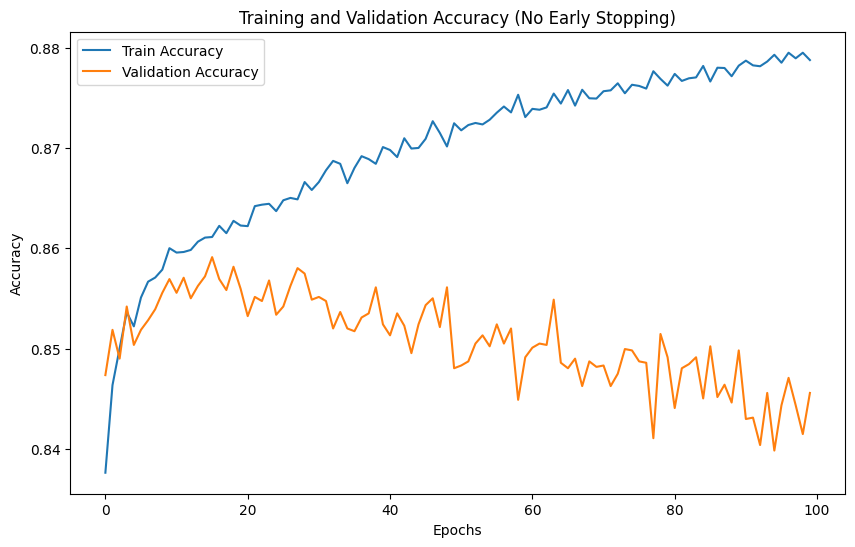

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(history_no_es.history['accuracy'], label='Train Accuracy')
plt.plot(history_no_es.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy (No Early Stopping)')
plt.legend()
plt.show()

In [56]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model_es = Sequential()
model_es.add(Dense(64, input_dim=input_dim, activation='relu'))
model_es.add(Dense(32, activation='relu'))
model_es.add(Dense(1, activation='sigmoid'))

model_es.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

history_es = model_es.fit(X_train_final, y_train, validation_data=(X_val_final, y_val), epochs=100, batch_size=32, verbose=1, callbacks=[early_stop])

Epoch 1/100
1068/1068 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8143 - loss: 0.3847 - val_accuracy: 0.8433 - val_loss: 0.3294
Epoch 2/100
1068/1068 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8481 - loss: 0.3248 - val_accuracy: 0.8524 - val_loss: 0.3236
Epoch 3/100
1068/1068 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8482 - loss: 0.3228 - val_accuracy: 0.8513 - val_loss: 0.3186
Epoch 4/100
1068/1068 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8483 - loss: 0.3235 - val_accuracy: 0.8520 - val_loss: 0.3159
Epoch 5/100
1068/1068 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8523 - loss: 0.3161 - val_accuracy: 0.8519 - val_loss: 0.3147
Epoch 6/100
1068/1068 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8573 - loss: 0.3116 - val_accuracy: 0.8527 - val_loss: 0.3165
Epoch 7/100
1068/1068 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8575 - loss: 0.3077 - val_accuracy: 0.8528 - val_loss: 0.3112
Epoch 8/100
1068/1068 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8556 - loss: 0

## Part 5: Reflection
1. Summarize what you learned about:
   - The role of optimizers
   - The effect of batch size
   - Regularization methods
   - Early stopping
   - Train/validation/test splits
2. If you had to train a deep learning model on a new tabular dataset, what choices would you make for:
   - Optimizer
   - Batch size
   - Regularization
   - Early stopping
   - Data splitting strategy  
   and why?

**What I learned**

**Role of Optimizers:**

* Optimizers control how the network updates weights during training.

* Adam often performs better than plain SGD because it adapts learning rates for each parameter and uses momentum, leading to faster convergence and better generalization.


**Effect of Batch Size:**

* Small batch sizes (32–128) introduce noise in gradient updates, which acts as a regularizer and often improves generalization.

* Large batch sizes converge faster but may overfit and generalize worse.

* Batch size = 1 → noisiest gradients.

**Regularization Methods:**

* L2 regularization penalizes large weights to reduce overfitting.

* Dropout randomly disables neurons during training, preventing co-adaptation and usually more effective on deep networks.

**Early Stopping:**

* Monitors validation loss and stops training before the model starts overfitting.

* Helps keep the best weights and reduces unnecessary training epochs.

**Train/Validation/Test Splits:**

* Proper splitting ensures that the model is evaluated fairly on unseen data.

* Common strategy: 70% train, 15% validation, 15% test.

* Validation set is crucial for tuning hyperparameters and early stopping.

**Choices for a new tabular dataset**

1- Optimizer **- >** Adam

* Fast convergence, adaptive learning rates, works well with most tabular data.

2- Batch Size **- >** 32–128

* Balance between training speed and good generalization.

* Small enough to introduce useful gradient noise.

3- Regularization **- >** Dropout + optional L2

* Dropout prevents co-adaptation of neurons.

* L2 can help further constrain large weights if needed.

4- Early Stopping **- >** monitor validation loss

* Prevents overfitting, automatically stops training at the optimal point.


5- Stratify splits if target classes are imbalanced.